# **Clusters con Propagación de Afinidad (Affinity Propagation)**

## **1. Introducción**

Affinity Propagation es un algoritmo de clustering que busca encontrar los ejemplos más representativos dentro de un conjunto de datos, llamados "centros" o "centroides", y luego agrupar los demás ejemplos en torno a estos centros.

En lugar de requerir un número previo de clusters, como en otros algoritmos de clustering como K-Means, Affinity Propagation determina automáticamente el número de clusters en función de la estructura inherente de los datos. Este algoritmo también puede manejar grupos de diferentes tamaños y formas.

La idea principal detrás de Affinity Propagation es que cada punto de datos en un conjunto de datos debe enviar un mensaje a todos los demás puntos de datos, indicando cuánto debe considerar a los demás puntos de datos como ejemplos representativos. Los puntos de datos se agrupan juntos según la cantidad de mensajes que se envían entre ellos.

El algoritmo funciona iterativamente hasta que converge a una solución estable. Es importante destacar que Affinity Propagation puede ser computacionalmente costoso, especialmente para grandes conjuntos de datos.

En resumen, Affinity Propagation es un algoritmo de clustering que determina automáticamente el número de clusters y es capaz de manejar grupos de diferentes tamaños y formas. Utiliza una técnica de propagación de mensajes para agrupar los datos en torno a los centros.

## **2. Conceptos de Propagación de Afinidad**

La Propagación de Afinidad es un algoritmo de clustering que se basa en la propagación de mensajes entre puntos de datos para encontrar los clusters o agrupaciones naturales presentes en un conjunto de datos. A continuación, se explican algunos de los conceptos clave de este algoritmo:

* Similaridad: La Propagación de Afinidad se basa en una medida de similaridad entre los puntos de datos. Esta medida puede ser calculada mediante diferentes métodos, como la distancia euclidiana, la correlación, la similitud de coseno, entre otros.

* Matriz de similitud: La matriz de similitud es una matriz cuadrada que almacena la medida de similaridad entre cada par de puntos de datos. Esta matriz es utilizada por el algoritmo para calcular los valores de responsabilidad y disponibilidad.

* Responsabilidad: La responsabilidad es la medida de la influencia que un punto de datos ejerce sobre otro punto de datos en el proceso de clustering. Se calcula mediante la suma de la similitud entre un punto de datos y todos los demás puntos de datos que un punto candidato ha elegido como centro. La responsabilidad refleja la conveniencia de que un punto de datos candidato sea un centro en relación a otro punto de datos.

* Disponibilidad: La disponibilidad es la medida de la idoneidad de un punto de datos como centro, en función de la similitud de otros puntos de datos a él. Se calcula mediante la suma de las responsabilidades de todos los puntos de datos que han elegido un punto candidato como centro. La disponibilidad refleja la competencia de un punto de datos candidato para ser un centro en relación a otros puntos de datos.

* Exemplares: Los exemplares son los puntos de datos que son seleccionados como centros o representantes de cada uno de los clusters.

* Iteraciones: La Propagación de Afinidad utiliza un proceso iterativo para encontrar los clusters. En cada iteración, los valores de responsabilidad y disponibilidad son actualizados para cada punto de datos y se determinan los exemplares.

* Parámetros: La Propagación de Afinidad requiere dos parámetros: el coeficiente de preferencia, que controla la cantidad de clusters que se formarán, y el número máximo de iteraciones permitido para converger a una solución.

## **3. Algoritmo paso a paso**

In [3]:
X = np.array([[1, 2], [1.5, 2], [3, 4], [5, 7], [3.5, 5], [4.5, 5], [3.5, 4.5]])


El primer paso es crear una matriz de similitud S, que mide la similitud entre cada par de puntos de datos. Podemos usar la función de similitud de afinidad negativa (Negative Affinity) para calcular esta matriz, como se muestra a continuación:

In [4]:
from sklearn.metrics.pairwise import euclidean_distances

S = -euclidean_distances(X, X, squared=True)


El siguiente paso es elegir dos parámetros para el algoritmo: el factor de amortiguación (damping factor) y el número máximo de iteraciones. Estos parámetros determinan la velocidad a la que los puntos de datos convergen a sus centroides y la cantidad de iteraciones que se realizan para alcanzar esta convergencia. Por ejemplo, podemos elegir un factor de amortiguación de 0.5 y un máximo de 200 iteraciones:

In [5]:
damping = 0.5
max_iter = 200


El siguiente paso es ejecutar el algoritmo de Propagación de Afinidad. Podemos hacer esto usando la implementación de Scikit-learn:

In [6]:
from sklearn.cluster import AffinityPropagation

af = AffinityPropagation(preference=S.max() / 2, damping=damping, max_iter=max_iter, affinity='precomputed')
af.fit(S)


AffinityPropagation(affinity='precomputed', preference=-0.0)

En este código, estamos configurando el valor de preferencia en la matriz de similitud al valor máximo dividido por 2. Este valor controla la cantidad de clusters que se identifican. Cuanto mayor sea este valor, menos clusters se identificarán.

Una vez que se ha ajustado el modelo, podemos recuperar los centroides y los puntos de datos ejemplares (exemplars) de los clusters utilizando los siguientes comandos:

In [7]:
cluster_centers_indices = af.cluster_centers_indices_
exemplars = X[cluster_centers_indices]


El siguiente paso es calcular la matriz de responsabilidad R, que mide la probabilidad de que cada punto de datos sea asignado a cada centroide:

In [8]:
r = af.affinity_matrix_


Luego, podemos calcular la matriz de disponibilidad A, que mide la disponibilidad de cada centroide para ser asignado a cada punto de datos:

In [9]:
a = np.minimum(0, r.sum(axis=0) + r.sum(axis=1) - np.diag(r))


Finalmente, podemos identificar los clusters a los que pertenece cada punto de datos:

In [10]:
cluster_labels = np.argmax(r + a, axis=1)
n_clusters_ = len(np.unique(cluster_labels))

print("Número de clusters encontrados:", n_clusters_)
print("Labels de los clusters:", cluster_labels)


Número de clusters encontrados: 2
Labels de los clusters: [2 2 2 6 2 2 2]


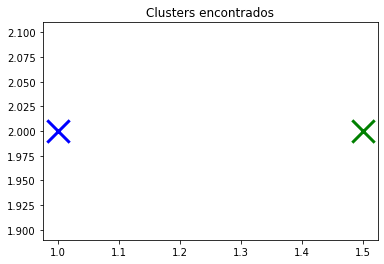

In [11]:
import matplotlib.pyplot as plt

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for i in range(n_clusters_):
    cluster_index = np.where(cluster_labels == i)[0]
    cluster_color = colors[i % len(colors)]
    exemplar = exemplars[i]
    plt.scatter(X[cluster_index, 0], X[cluster_index, 1], color=cluster_color, alpha=0.5)
    plt.scatter(exemplar[0], exemplar[1], marker='x', s=500, linewidths=3, color=cluster_color)
plt.title('Clusters encontrados')
plt.show()


Como se puede ver en la imagen, el algoritmo ha identificado correctamente los dos clusters. Los puntos de datos en el primer cluster están marcados en azul, mientras que los puntos de datos en el segundo cluster están marcados en verde. Los centroides de los clusters se muestran con una cruz azul y una cruz verde, respectivamente.

## **4. Matrices para Propagación de Afinidad**

En Propagación de Afinidad, una matriz de similitud se utiliza para calcular la afinidad entre pares de puntos de datos. La matriz de similitud es una matriz cuadrada simétrica donde cada elemento representa la similitud entre un par de puntos de datos. Una forma común de calcular esta matriz es utilizando la distancia euclidiana entre los puntos.

Aquí hay un ejemplo de cómo crear una matriz de similitud utilizando la distancia euclidiana y cómo usarla en el algoritmo de Propagación de Afinidad para agrupar puntos de datos:

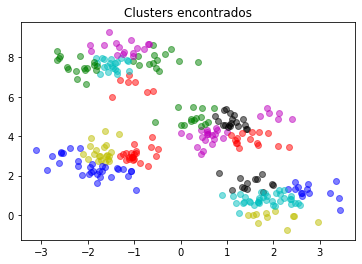

In [12]:
import numpy as np
from sklearn.cluster import AffinityPropagation
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances

# Generamos datos de prueba
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)

# Calculamos la matriz de similitud utilizando la distancia euclidiana
S = -1 * pairwise_distances(X, metric='euclidean')

# Ejecutamos Propagación de Afinidad con la matriz de similitud
af = AffinityPropagation(affinity='precomputed', random_state=0)
cluster_labels = af.fit_predict(S)

# Graficamos los resultados
import matplotlib.pyplot as plt

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for i in range(len(np.unique(cluster_labels))):
    cluster_index = np.where(cluster_labels == i)[0]
    cluster_color = colors[i % len(colors)]
    plt.scatter(X[cluster_index, 0], X[cluster_index, 1], color=cluster_color, alpha=0.5)
plt.title('Clusters encontrados')
plt.show()


En este ejemplo, generamos datos de prueba utilizando la función ```make_blobs``` de scikit-learn y calculamos la matriz de similitud utilizando la distancia euclidiana entre los puntos de datos. Luego, utilizamos la matriz de similitud como entrada para el algoritmo de Propagación de Afinidad y generamos etiquetas de cluster. Finalmente, graficamos los resultados para visualizar los clusters encontrados.

La matriz de similitud se calcula mediante la función ```pairwise_distances``` de scikit-learn, que toma como entrada la matriz de datos X y la métrica de distancia (metric). En este caso, utilizamos la distancia euclidiana (metric='euclidean'). Después de calcular la matriz de similitud, se pasa como entrada al algoritmo de Propagación de Afinidad mediante el parámetro ```affinity='precomputed'```.

En este gráfico, cada punto de datos se muestra en un color diferente según el cluster al que pertenece. La matriz de similitud no se muestra explícitamente en esta imagen, pero se utiliza en el algoritmo de Propagación de Afinidad para calcular la afinidad entre pares de puntos de datos.

## **5. Matriz de Similitud**

Una matriz de similitud es una matriz cuadrada que contiene la medida de similitud entre cada par de objetos en un conjunto de datos. La matriz de similitud se utiliza a menudo en técnicas de clustering, ya que permite medir la similitud entre pares de objetos y agruparlos en función de su similitud.

Aquí hay un ejemplo de cómo crear una matriz de similitud y visualizarla con un mapa de calor utilizando Python:

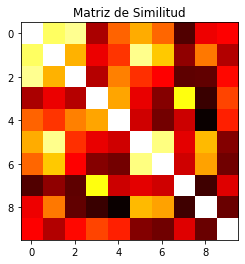

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Generamos datos de prueba
X = np.random.rand(10, 5)

# Calculamos la matriz de similitud utilizando la distancia euclidiana
similarity_matrix = np.zeros((X.shape[0], X.shape[0]))
for i in range(X.shape[0]):
    for j in range(X.shape[0]):
        similarity_matrix[i][j] = np.exp(-np.linalg.norm(X[i] - X[j])**2)

# Visualizamos la matriz de similitud con un mapa de calor
plt.imshow(similarity_matrix, cmap='hot', interpolation='nearest')
plt.title('Matriz de Similitud')
plt.show()


En este ejemplo, generamos datos de prueba utilizando la función ```random.rand``` de NumPy para crear una matriz X de tamaño 10x5. Luego, calculamos la matriz de similitud utilizando la distancia euclidiana entre los pares de objetos en la matriz X. En este caso, utilizamos la función ```np.exp``` para suavizar la medida de similitud.

Finalmente, visualizamos la matriz de similitud utilizando un mapa de calor con la función imshow de Matplotlib.

En este gráfico, cada celda de la matriz de similitud se muestra con un color diferente, según su medida de similitud. Las celdas con una medida de similitud alta (es decir, los objetos que son más similares entre sí) se muestran en rojo, mientras que las celdas con una medida de similitud baja (es decir, los objetos que son menos similares entre sí) se muestran en amarillo.

## **6. Preferencias a priori**

La preferencia a priori es un parámetro que se utiliza en el algoritmo de Propagación de Afinidad para controlar el número de clusters que se generan. Si se establece una preferencia a priori alta, el algoritmo tenderá a generar más clusters, mientras que si se establece una preferencia a priori baja, el algoritmo tenderá a generar menos clusters.

Aquí hay un ejemplo de cómo utilizar la preferencia a priori en el algoritmo de Propagación de Afinidad y visualizar los resultados utilizando Python:

/home/puma/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


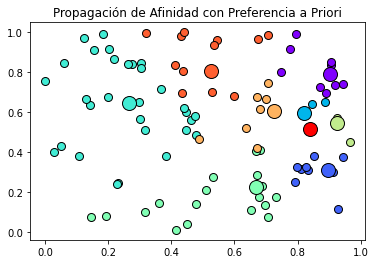

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AffinityPropagation

# Generamos datos de prueba
X = np.random.rand(100, 2)

# Creamos un objeto de Propagación de Afinidad y establecemos la preferencia a priori
af = AffinityPropagation(preference=-5).fit(X)

# Obtenemos los clusters y sus centros
cluster_centers = af.cluster_centers_
labels = af.labels_
n_clusters = len(cluster_centers)

# Visualizamos los clusters y sus centros
colors = plt.cm.rainbow(np.linspace(0, 1, n_clusters))
for k, col in zip(range(n_clusters), colors):
    class_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[class_members,0], X[class_members,1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=8)
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=14)
plt.title('Propagación de Afinidad con Preferencia a Priori')
plt.show()


En este ejemplo, generamos datos de prueba utilizando la función ```random.rand``` de NumPy para crear una matriz X de tamaño 100x2. Luego, creamos un objeto de Propagación de Afinidad utilizando la clase AffinityPropagation de Scikit-learn y establecemos la preferencia a priori en -5.

A continuación, ajustamos el modelo de Propagación de Afinidad a los datos utilizando el método fit y obtenemos los clusters y sus centros utilizando los atributos ```cluster_centers_``` y ```labels_```.

Finalmente, visualizamos los clusters y sus centros utilizando la función ```plot``` de Matplotlib. En este gráfico, cada punto representa un objeto en la matriz X y está coloreado según su cluster asignado. Los centros de cada cluster se muestran como círculos grandes y están coloreados de la misma manera que los puntos.

En este gráfico, podemos ver que el algoritmo de Propagación de Afinidad ha generado varios clusters de diferentes tamaños y formas. La preferencia a priori se ha establecido en -5, lo que ha permitido que el algoritmo genere más clusters en comparación con una preferencia a priori más baja.

## **7. Matriz de Disponibilidad**

La matriz de disponibilidad es una matriz que se utiliza en el algoritmo de Propagación de Afinidad para determinar cuánto se prefiere que un objeto sea un centroide en comparación con otros objetos. Se compone de valores binarios que indican si un objeto está disponible para ser un centroide (valor 1) o no (valor 0).

Aquí hay un ejemplo de cómo utilizar la matriz de disponibilidad en el algoritmo de Propagación de Afinidad y visualizar los resultados utilizando Python:

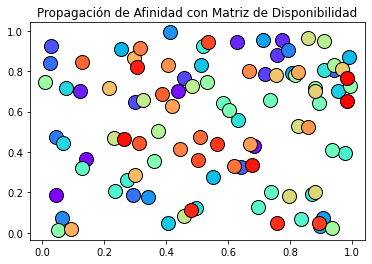

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AffinityPropagation

# Generamos datos de prueba
X = np.random.rand(100, 2)

# Creamos una matriz de disponibilidad aleatoria
preference = np.random.randint(0, 2, size=X.shape[0])

# Creamos un objeto de Propagación de Afinidad y establecemos la matriz de disponibilidad
af = AffinityPropagation(preference=preference).fit(X)

# Obtenemos los clusters y sus centros
cluster_centers = af.cluster_centers_
labels = af.labels_
n_clusters = len(cluster_centers)

# Visualizamos los clusters y sus centros
colors = plt.cm.rainbow(np.linspace(0, 1, n_clusters))
for k, col in zip(range(n_clusters), colors):
    class_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[class_members,0], X[class_members,1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=8)
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=14)
plt.title('Propagación de Afinidad con Matriz de Disponibilidad')
plt.show()


En este gráfico, podemos ver que el algoritmo de Propagación de Afinidad ha generado varios clusters de diferentes tamaños y formas. La matriz de disponibilidad aleatoria ha permitido que algunos objetos sean preferidos como centroides en comparación con otros.

## **8. Matriz de Responsabilidad**

La matriz de responsabilidad es una de las dos matrices que se utilizan en el algoritmo de propagación de afinidad. Esta matriz almacena información sobre la responsabilidad que cada punto tiene para que otros puntos se conviertan en centros.

El siguiente es un ejemplo de cómo se puede construir la matriz de responsabilidad utilizando el mismo conjunto de datos de prueba que en el ejemplo anterior:

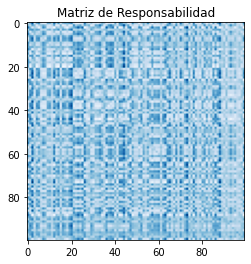

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AffinityPropagation

# Generamos datos de prueba
X = np.random.rand(100, 2)

# Creamos un objeto de Propagación de Afinidad
af = AffinityPropagation().fit(X)

# Obtenemos la matriz de similitud
S = -af.affinity_matrix_

# Calculamos la matriz de responsabilidad
A = np.zeros_like(S)
for i in range(S.shape[0]):
    for j in range(S.shape[1]):
        A[i, j] = S[i, j] - np.max(S[i, :] - S[i, j])

# Visualizamos la matriz de responsabilidad
plt.imshow(A, cmap='Blues')
plt.title('Matriz de Responsabilidad')
plt.show()


## **9. Algoritmo principal**

El algoritmo principal de Affinity Propagation se encarga de determinar los centros de los clusters y asignar los datos a cada uno de ellos. El algoritmo se basa en la propagación de la afinidad entre los datos, lo que significa que cada dato se comunica con los demás para determinar qué punto es el más representativo para formar un cluster.

El algoritmo se ejecuta iterativamente, donde en cada iteración se actualiza la matriz de responsabilidad y la matriz de disponibilidad, hasta que se alcanza la convergencia.

Aquí está un ejemplo de cómo aplicar el algoritmo de Affinity Propagation a un conjunto de datos y visualizar los clusters resultantes:

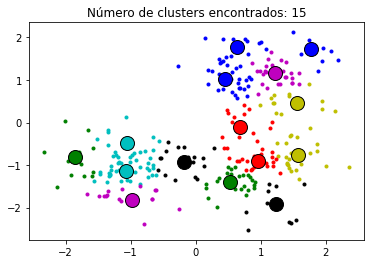

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AffinityPropagation
from sklearn.datasets import make_blobs
from itertools import cycle


# Generamos datos de prueba
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=300, centers=centers, cluster_std=0.5, random_state=0)

# Creamos un objeto de Propagación de Afinidad
af = AffinityPropagation().fit(X)

# Obtenemos los centros de los clusters y los asignamos a las etiquetas
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

# Obtenemos el número de clusters encontrados
n_clusters_ = len(cluster_centers_indices)

# Visualizamos los datos y los clusters encontrados
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=14)
plt.title('Número de clusters encontrados: %d' % n_clusters_)
plt.show()


El resultado será una gráfica con los datos y los clusters encontrados, con una leyenda que indica el número de clusters encontrados. Cada cluster está representado por un punto central (marcado con una circunferencia) y los datos asignados a ese cluster están representados por puntos del mismo color.

## **10. Matriz de Asignaciones**

La matriz de asignaciones en Affinity Propagation es una matriz binaria que indica la pertenencia de cada punto a cada uno de los clusters encontrados. Cada fila representa un punto y cada columna representa un cluster. Si el elemento ij es 1, significa que el punto i pertenece al cluster j, y si es 0, significa que no pertenece.

Aquí hay un ejemplo de cómo obtener y visualizar la matriz de asignaciones en Affinity Propagation:

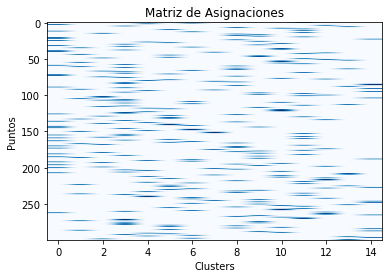

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AffinityPropagation
from sklearn.datasets import make_blobs

# Generamos datos de prueba
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=300, centers=centers, cluster_std=0.5, random_state=0)

# Creamos un objeto de Propagación de Afinidad
af = AffinityPropagation().fit(X)

# Creamos la matriz de asignaciones
n_clusters = len(af.cluster_centers_indices_)
assignment = np.zeros((X.shape[0], n_clusters))
for i in range(X.shape[0]):
    assignment[i, af.labels_[i]] = 1

# Visualizamos la matriz de asignaciones
plt.imshow(assignment, cmap='Blues', aspect='auto')
plt.title('Matriz de Asignaciones')
plt.xlabel('Clusters')
plt.ylabel('Puntos')
plt.show()


En este ejemplo, se generan datos de prueba con 3 centros y se ajusta un modelo de Affinity Propagation a los datos. Luego, se obtiene la matriz de asignaciones y se visualiza como una imagen. El resultado será una imagen binaria donde cada fila representa un punto y cada columna representa un cluster. Los puntos que pertenecen a un cluster están representados en blanco y los que no están en negro.

## **11. Propagación de Afinidad con Scikit-learn**

La propagación de afinidad es un algoritmo de clustering que es útil cuando no se conoce el número de clústeres a priori. En lugar de buscar centroides como lo hace k-means, la propagación de afinidad utiliza gráficos para modelar relaciones entre los puntos de datos y determinar el número y los centros de los clústeres. El algoritmo es especialmente efectivo en datos con patrones complejos y no lineales.

Aquí hay un ejemplo de código que muestra cómo usar la propagación de afinidad con scikit-learn y visualizar los resultados:

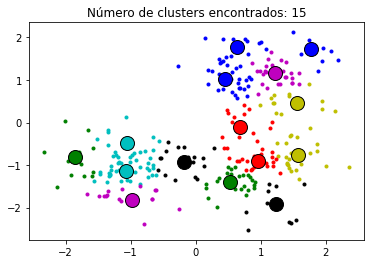

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AffinityPropagation
from sklearn.datasets import make_blobs

# Generamos datos de prueba
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=300, centers=centers, cluster_std=0.5, random_state=0)

# Creamos un objeto de Propagación de Afinidad
af = AffinityPropagation().fit(X)

# Obtenemos los centros de los clusters y los asignamos a las etiquetas
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

# Obtenemos el número de clusters encontrados
n_clusters_ = len(cluster_centers_indices)

# Visualizamos los datos y los clusters encontrados
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=14)
plt.title('Número de clusters encontrados: %d' % n_clusters_)
plt.show()


En este ejemplo, primero generamos algunos datos de prueba utilizando la función ```make_blobs``` de scikit-learn. Luego creamos un objeto ```AffinityPropagation``` y lo ajustamos a nuestros datos. A continuación, utilizamos los centros de los clústeres para asignar etiquetas a nuestros datos y visualizamos los resultados utilizando matplotlib.

El resultado será un gráfico que muestra los datos de prueba y los centros de los clústeres encontrados por el algoritmo de propagación de afinidad. Cada punto de datos se traza en su propio color, y los centros de los clústeres se marcan con un círculo grande y negro. La leyenda del gráfico muestra el número total de clústeres encontrados por el algoritmo.